In [12]:
!pip install torch_geometric

In [13]:
import numpy as np
import torch
from torch_geometric.data import Data
import gymnasium as gym
from gymnasium import spaces
from gerry_environment_23 import FrankenmanderingEnv
from graph_initiator import build_inchworm_init_data, build_inchworm_soc_init_data
from render_graph import render_graph

In [14]:
def labels_to_action(labels, num_districts, dtype=np.float32):
    """
    Convert an integer label vector (shape [N]) to an action matrix
    expected by env.step: shape (N, num_districts), each row is
    a 1-hot encoding of the desired district for that voter.
    """
    N = len(labels)
    A = np.zeros((N, num_districts), dtype=dtype)
    for i, lab in enumerate(labels):
        if lab >= 0 and lab < num_districts:
            A[i, int(lab)] = 1.0
        else:
            # keep row zeros -> will become -1 label in env.step (avoid if possible)
            pass
    return A

#Inch Worm Test

In [15]:
import matplotlib.pyplot as plt

def run_inchworm(env, districts, num_districts, drf):
    history = []
    for t, district in enumerate(districts, 1):
        assignment = labels_to_action(district, num_districts)
        # print(assignment)

        obs, reward, terminated, truncated, info = env.step(assignment,drf)

        fig = render_graph(obs)
        plt.show()
        opinions = obs.opinion.squeeze().tolist()
        reps = obs.reps
        history.append((opinions, reps))

        print(f"t={t}, reps={reps}, opinions={opinions}, reward={reward}")
    return history

Inchworm with empty social graph

In [16]:
def drf_inc_noso(discrepancy):
    delta = abs(discrepancy)

    if 0 == delta:
        return 0  # indifference

    elif 0 < delta < 3:
        return 1  # assimilation (pull closer)

    elif 3 <= delta < 10:
        return -1  # backfire (push away)

    elif 10 <= delta  :
        return 0  # irrelevance (ignored)

    elif delta == 0:
        return 0  # ambivalence

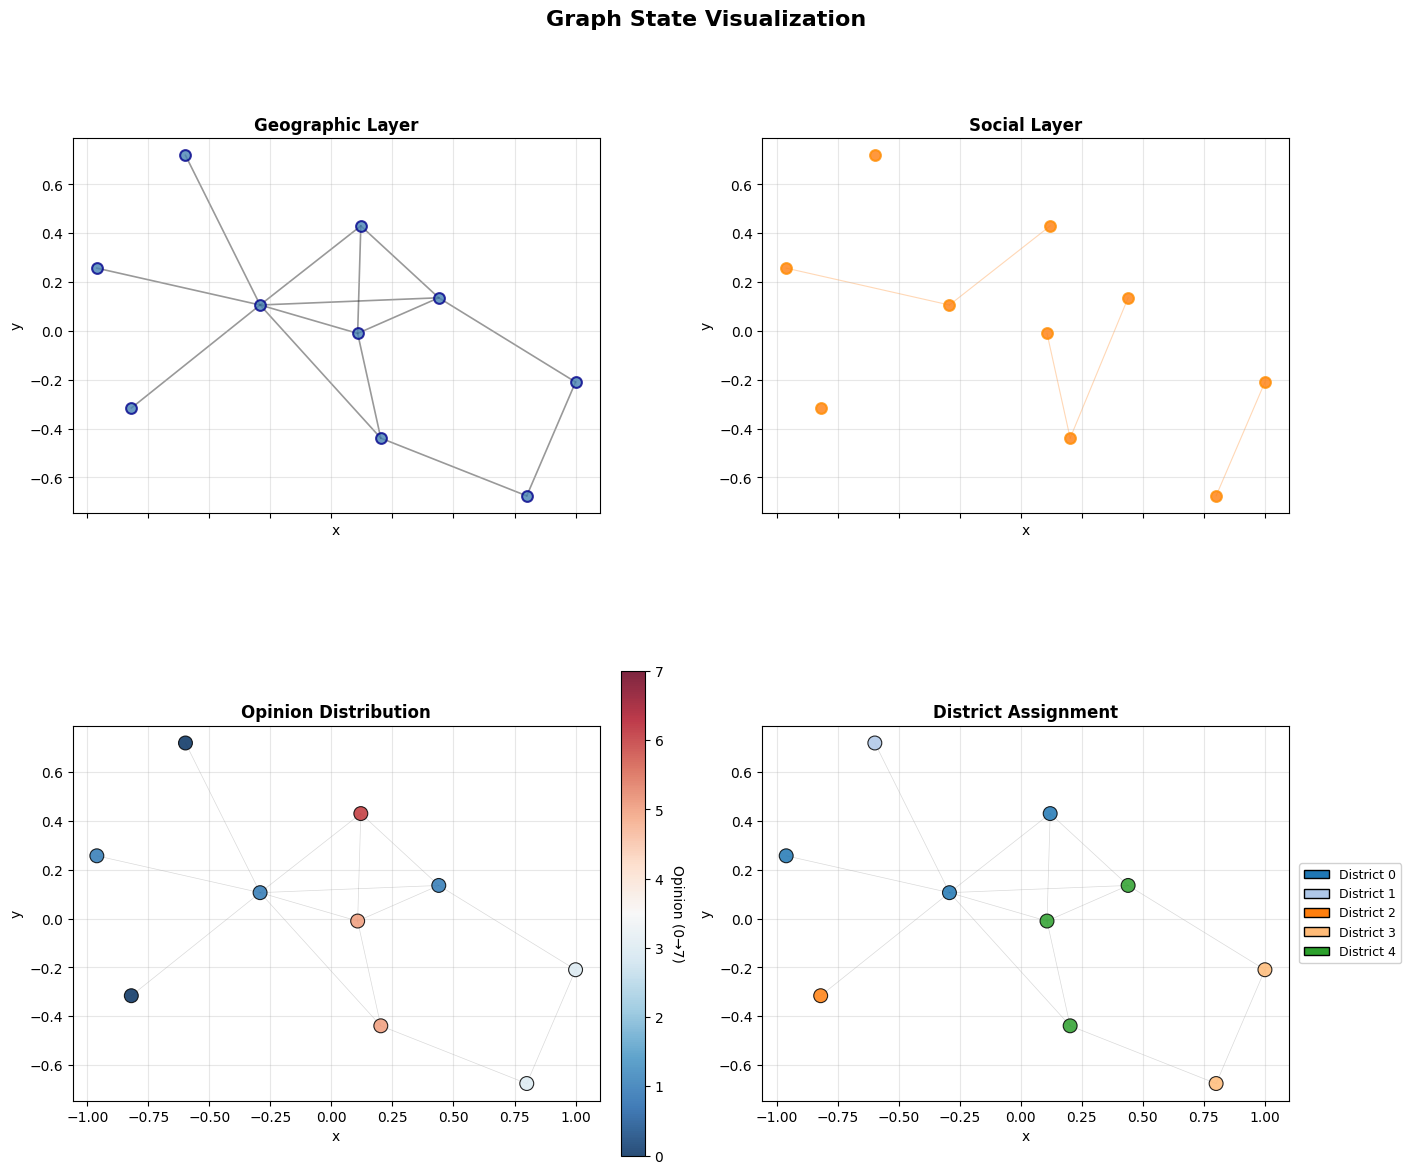

t=1, reps=[3, 0, 1, 5, 7], opinions=[0.0, 0.0, 1.0, 1.0, 1.0, 3.0, 3.0, 5.0, 5.0, 6.0], reward=-0.36142730712890625


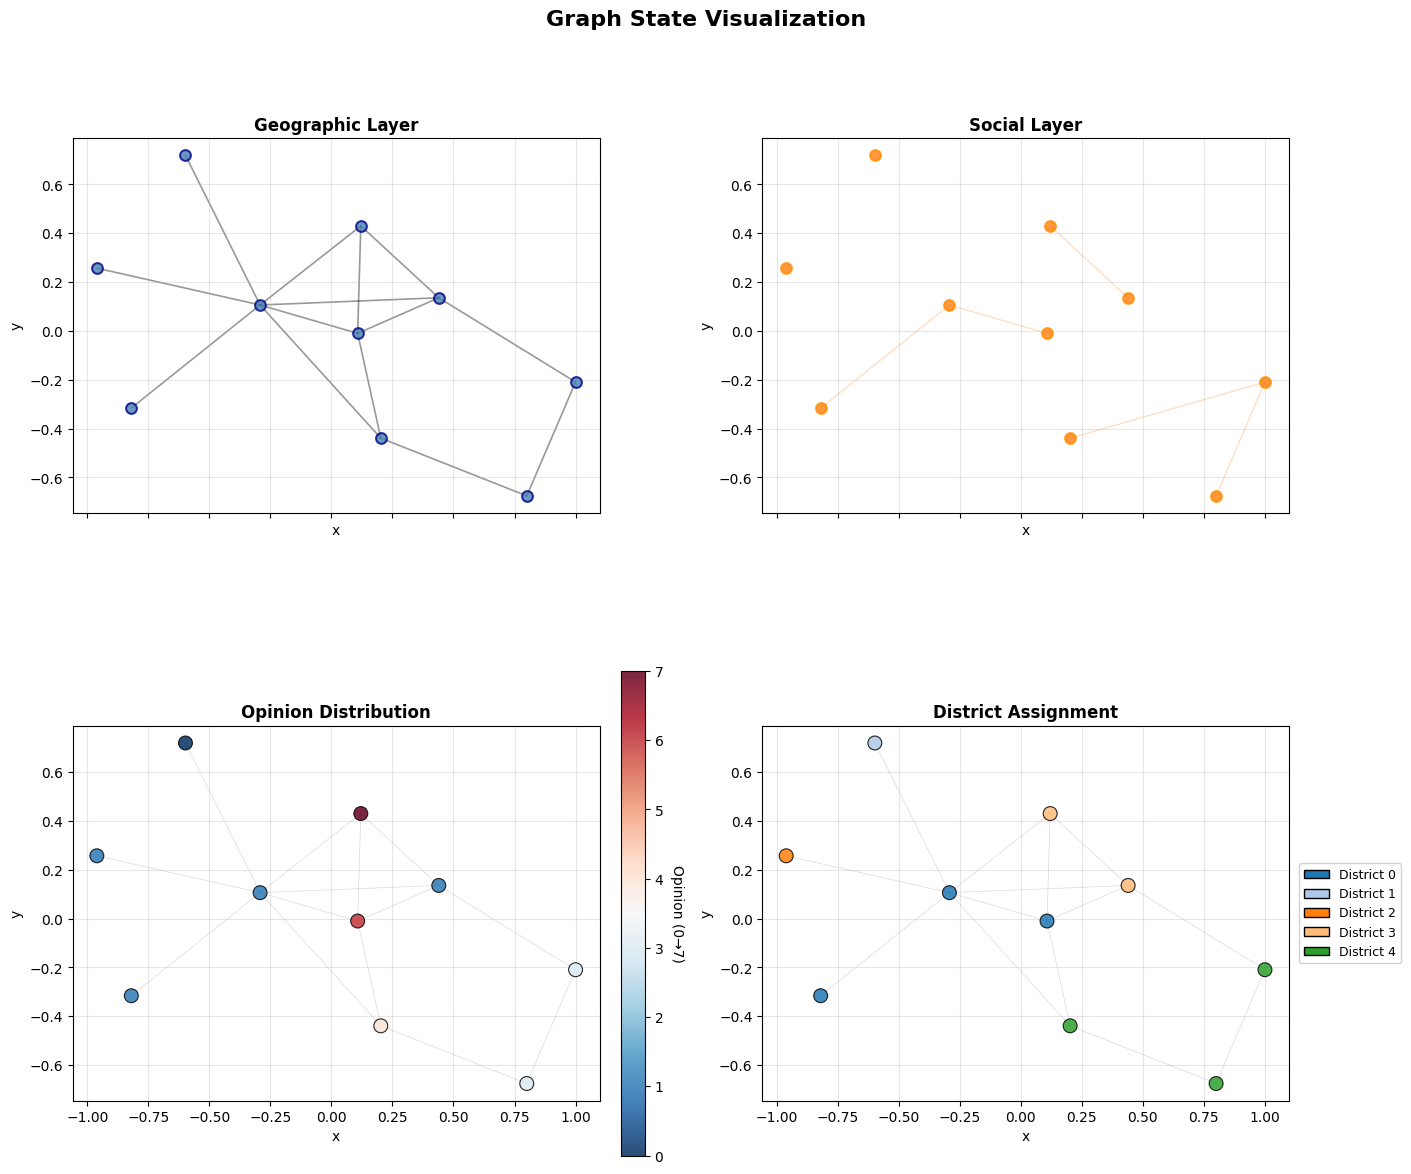

t=2, reps=[3, 0, 2, 4, 5], opinions=[0.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 6.0, 7.0], reward=-0.36142730712890625


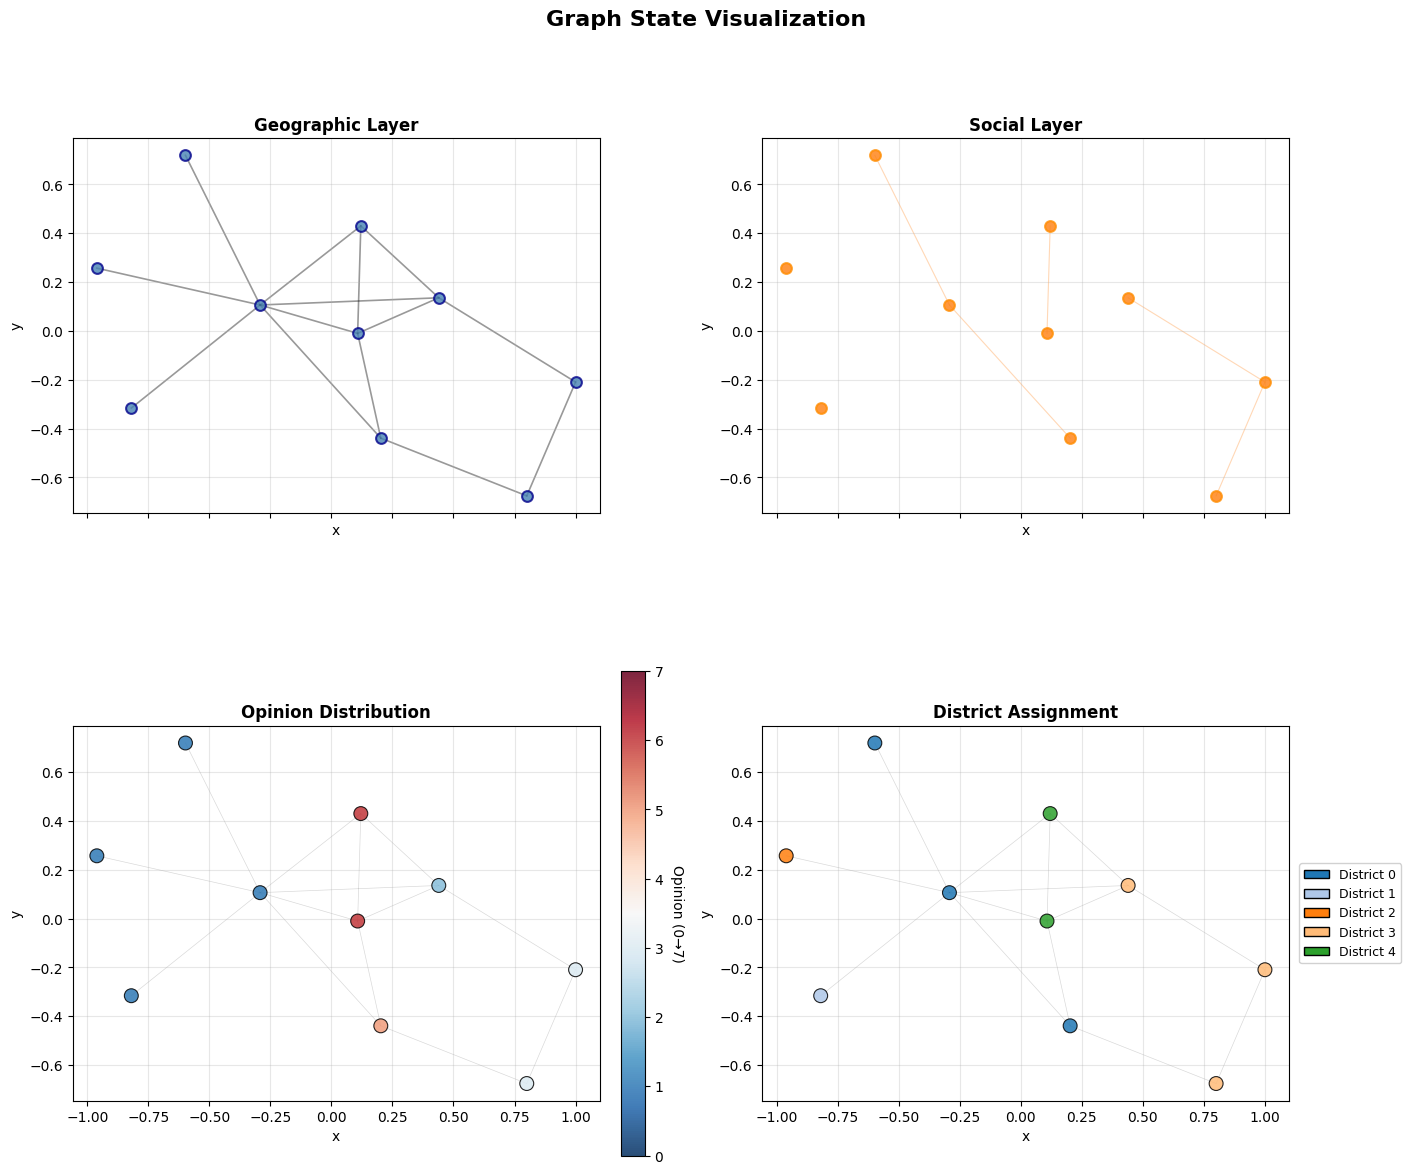

t=3, reps=[3, 1, 2, 5, 8], opinions=[1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 5.0, 6.0, 6.0], reward=3.6385726928710938


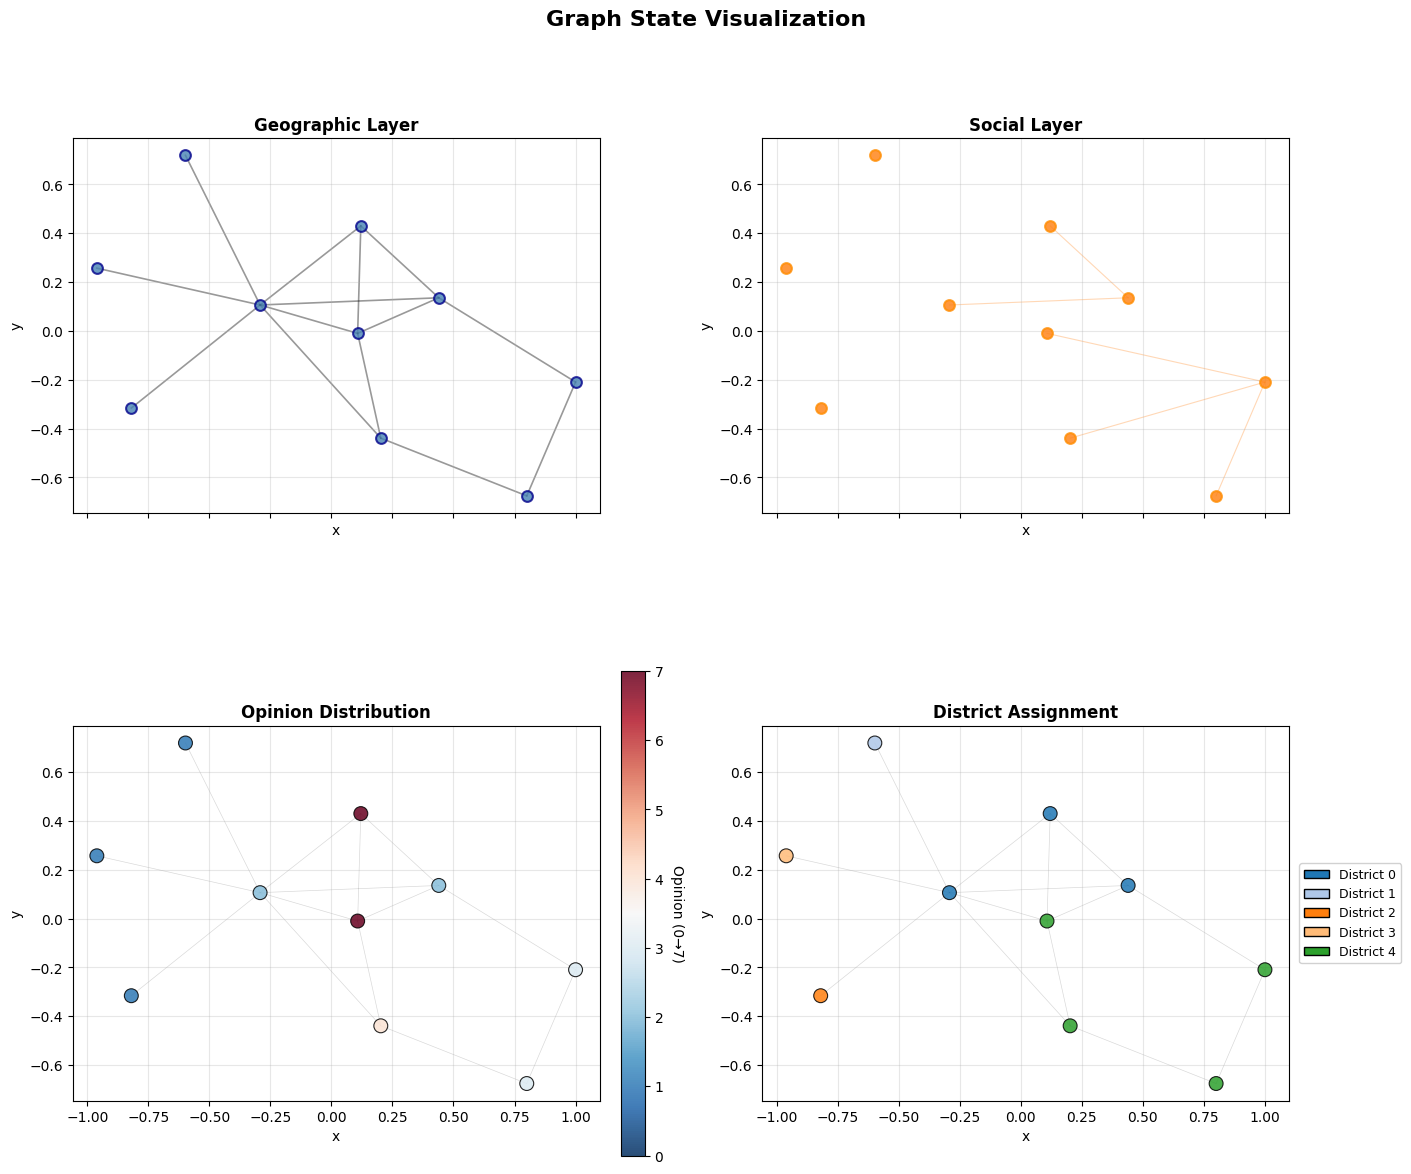

t=4, reps=[4, 0, 1, 2, 5], opinions=[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 7.0, 7.0], reward=-2.345714569091797


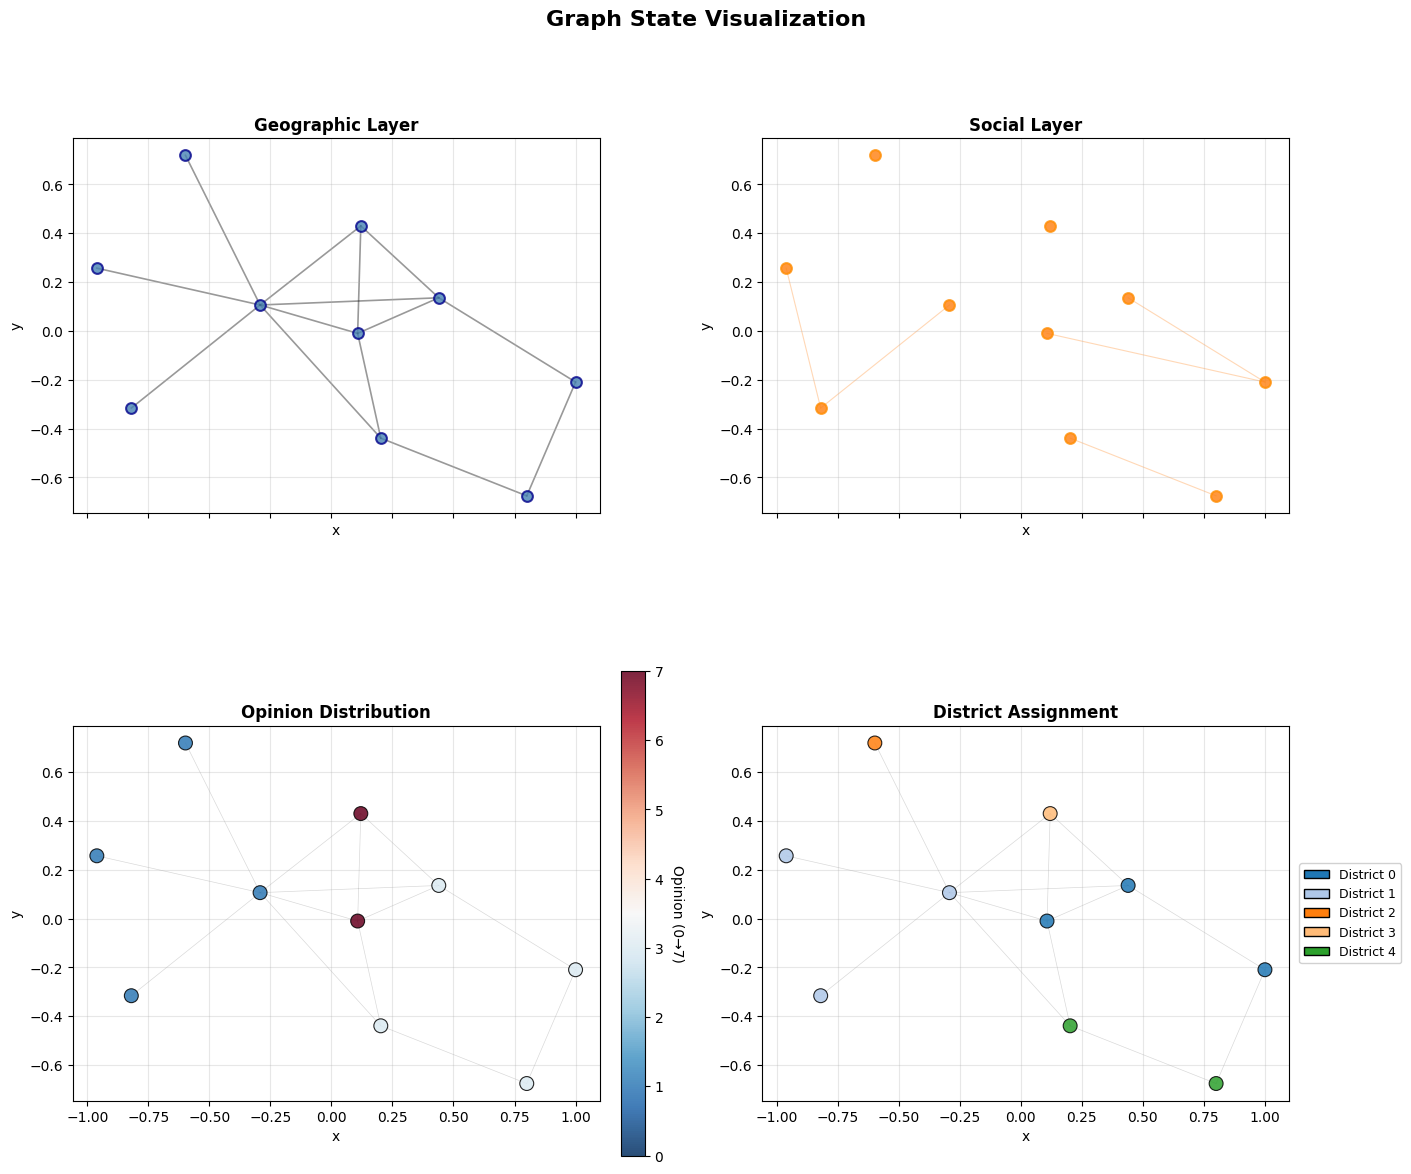

t=5, reps=[5, 1, 0, 9, 6], opinions=[1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 8.0, 7.0], reward=-2.3614273071289062


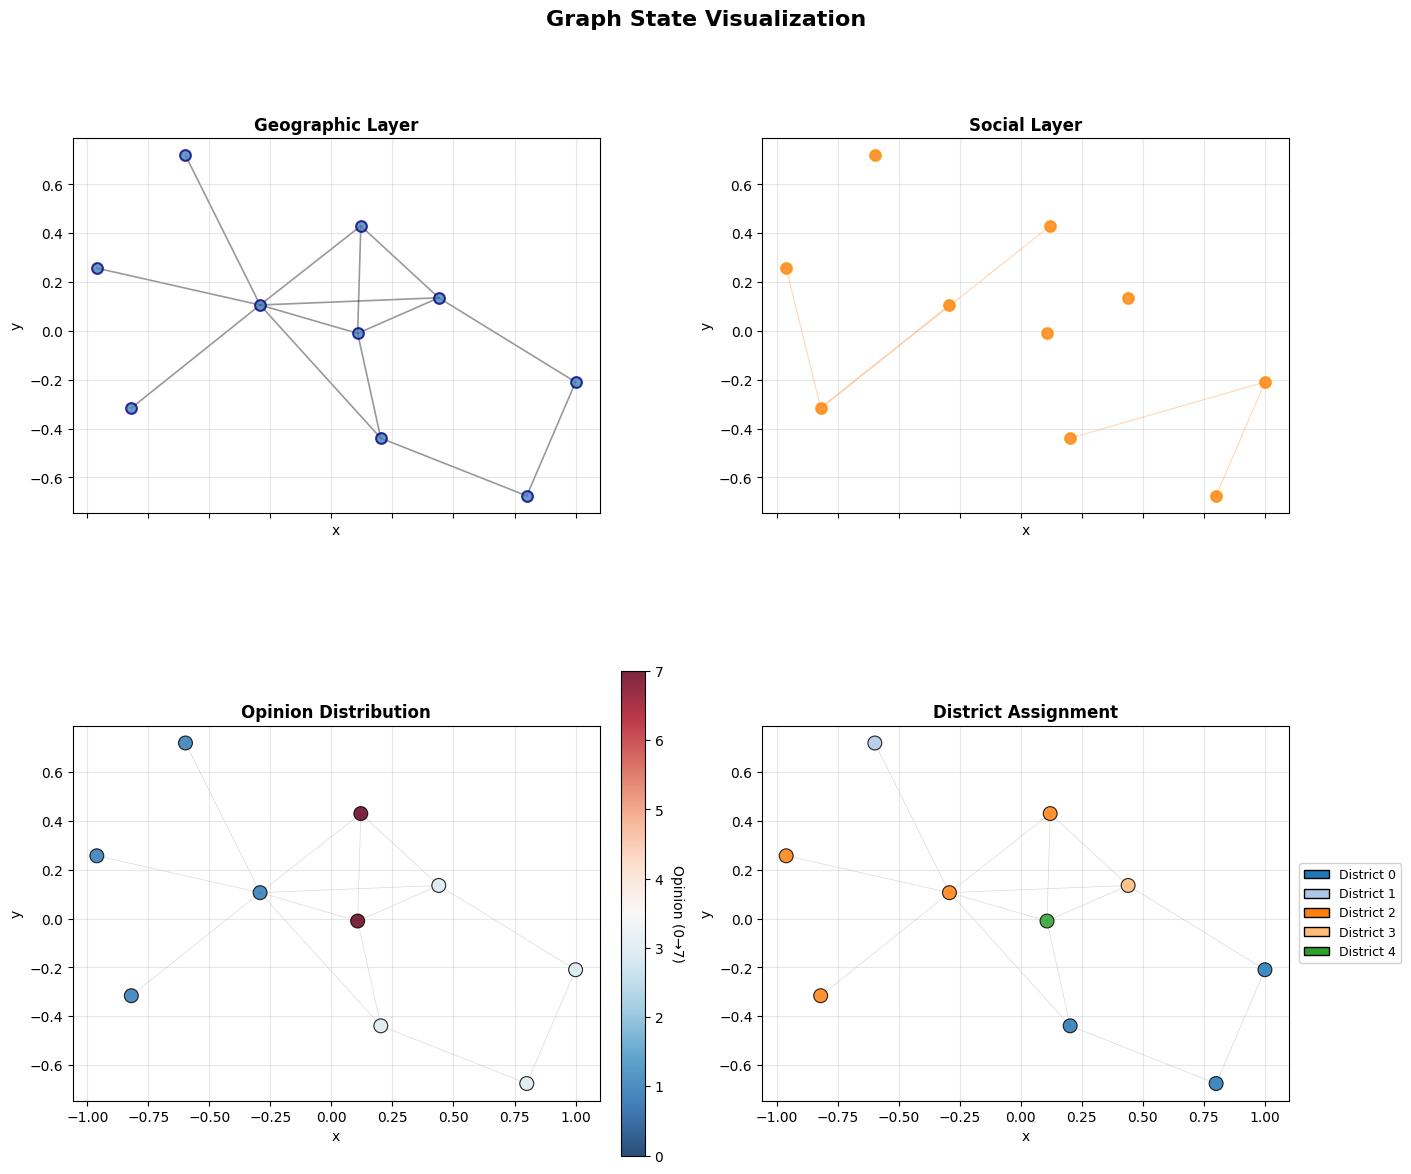

t=6, reps=[5, 0, 1, 4, 8], opinions=[1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 8.0, 8.0], reward=-1.3814277648925781


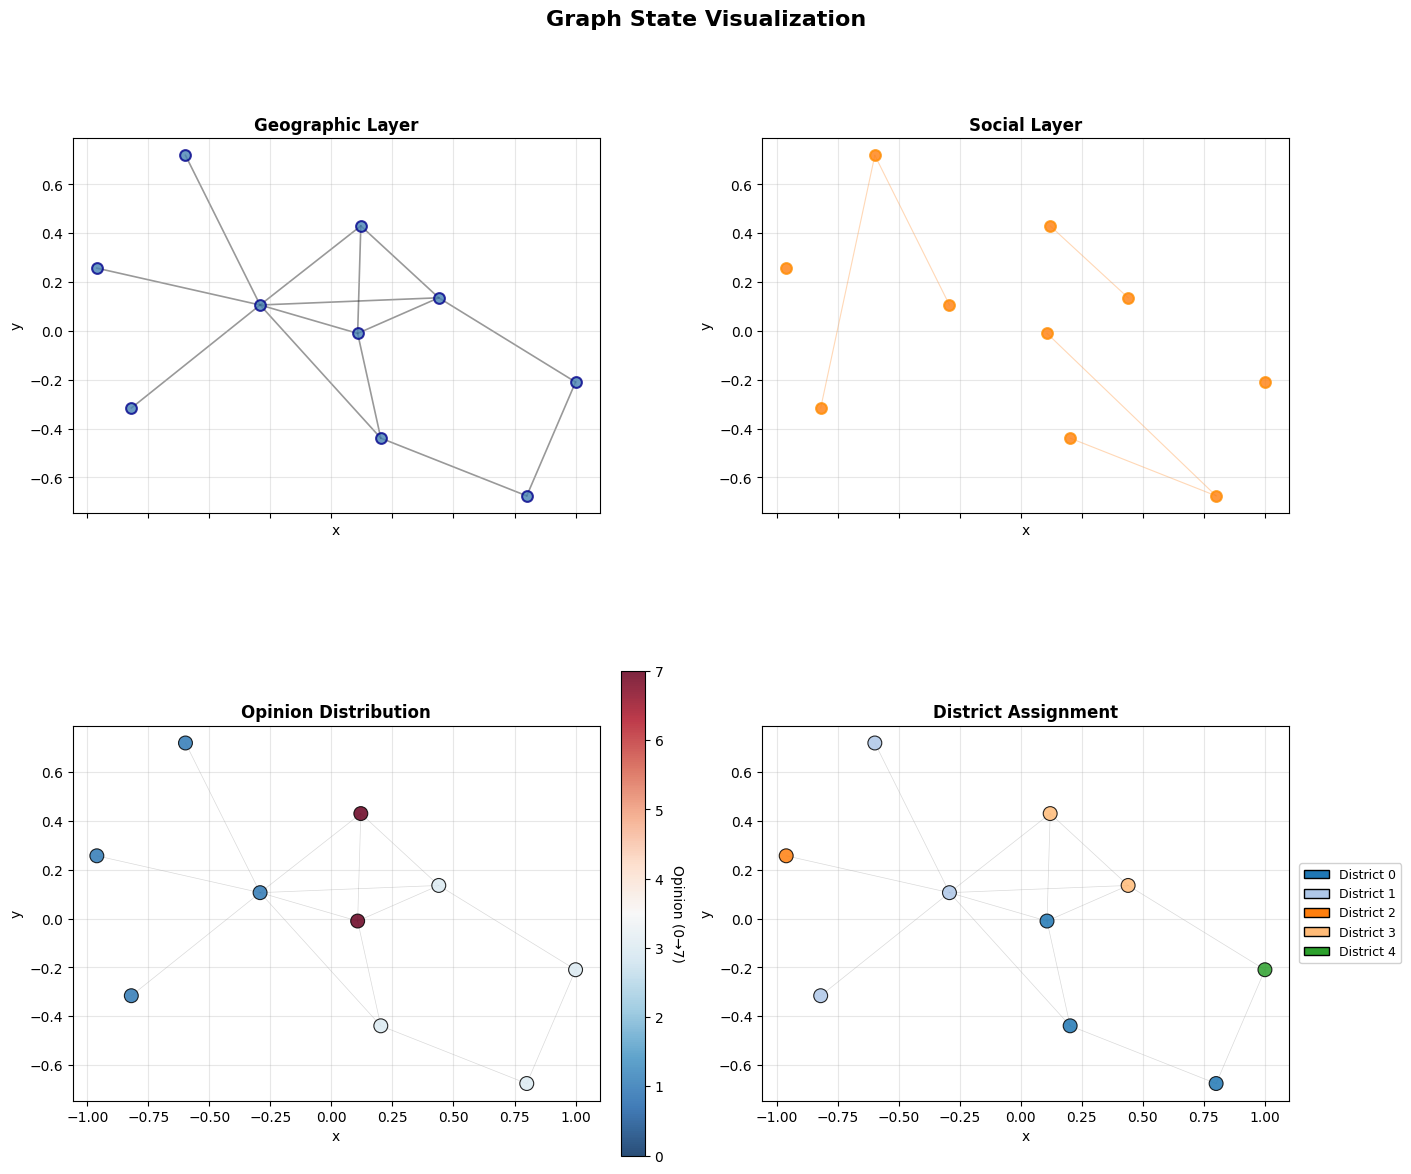

t=7, reps=[6, 0, 2, 4, 5], opinions=[1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 9.0, 9.0], reward=-2.3614273071289062


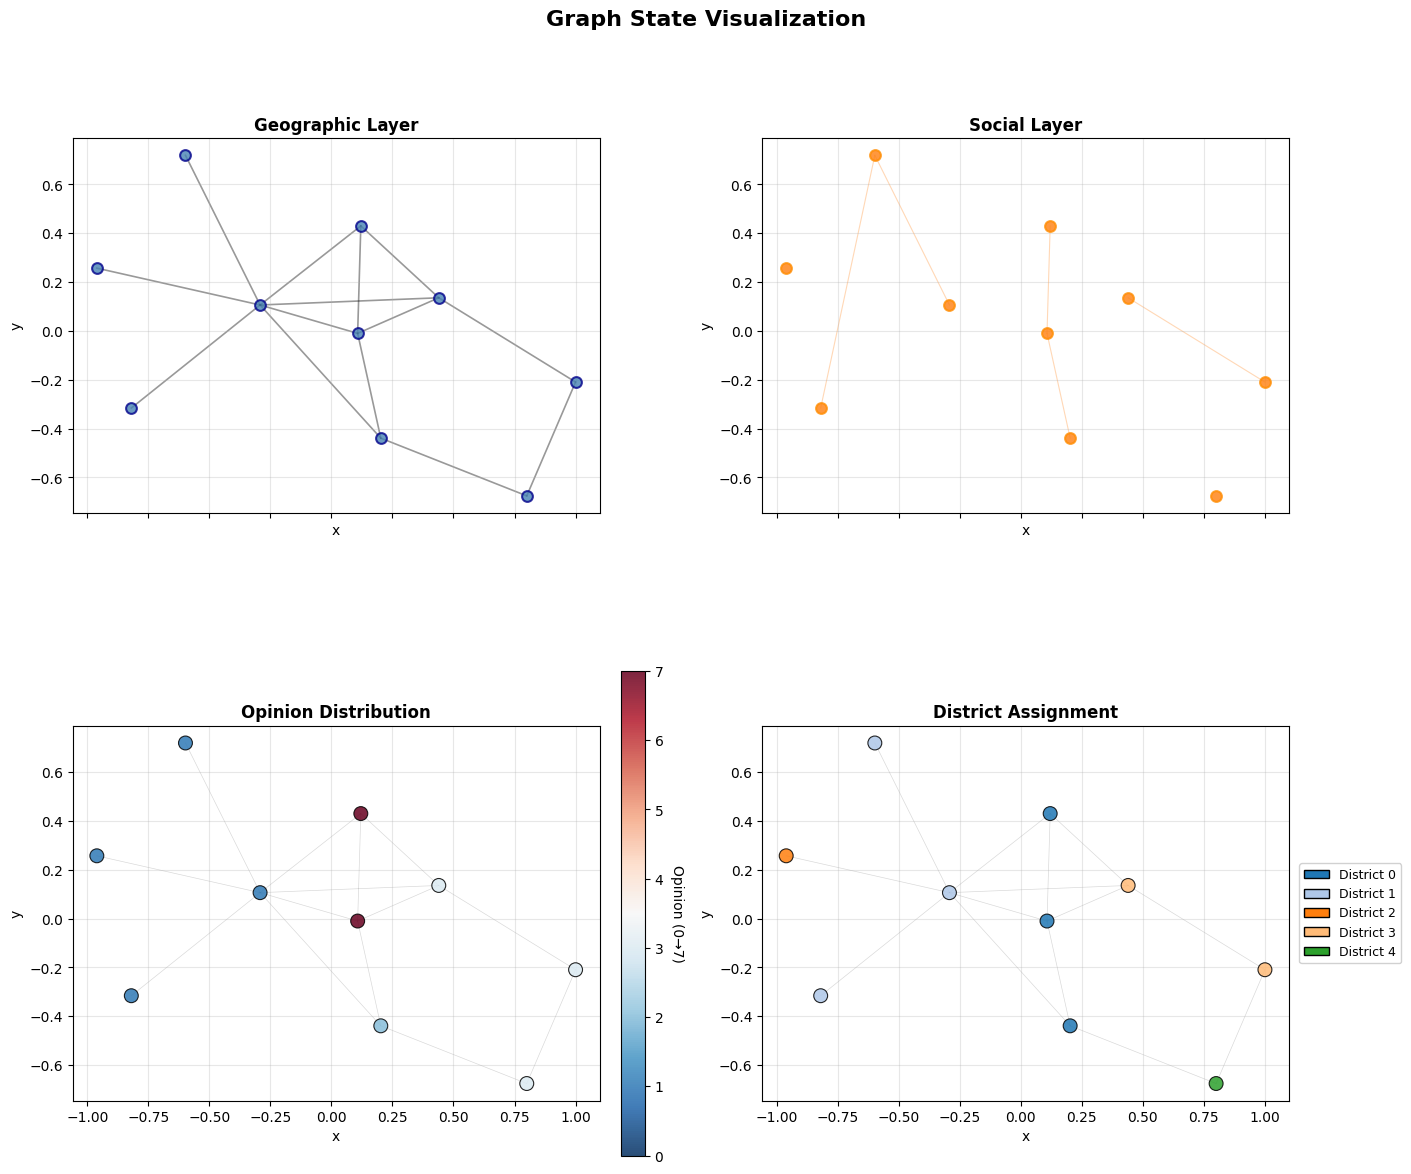

t=8, reps=[8, 0, 2, 4, 6], opinions=[1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 2.0, 9.0, 9.0], reward=-1.3614273071289062


In [17]:
init_inch_data, G_inch = build_inchworm_init_data()
num_voters = init_inch_data.opinion.shape[0]
num_districts = 5
target_opinion = [6,6,6,6,6,6,6,6,6,6]
env = FrankenmanderingEnv(num_voters=num_voters,
                          num_districts=num_districts,
                          FrankenData=init_inch_data,
                          opinion_dim = 1,
                          target_opinion =target_opinion)

obs, _ = env.reset()

districts = [
   [1,2,0,0,4,3,3,4,4,0],
   [1,0,2,0,3,4,4,4,0,3],
   [0,1,2,0,3,3,3,0,4,4],
   [1,2,3,0,0,4,4,4,4,0],
   [2,1,1,1,0,0,4,4,0,3],
   [1,2,2,2,3,0,0,0,4,2],
   [1,1,2,1,3,4,0,0,0,3],
   [1,1,2,1,3,3,4,0,0,0]
]
history = run_inchworm(env, districts, num_districts,drf_inc_noso)

Inchworm test with social graph

In [18]:
def drf_inchworm_withso(discrepancy):
    delta = abs(discrepancy)

    if 0 <= delta < 2:
        return 0  # indifference

    elif 2 <= delta < 4:
        return 1  # assimilation (pull closer)

    elif 4 <= delta < 6:
        return -1  # backfire (push away)

    elif 6 <= delta  :
        return 0  # irrelevance (ignored)

    elif delta <= 2:
        return 0  # ambivalence

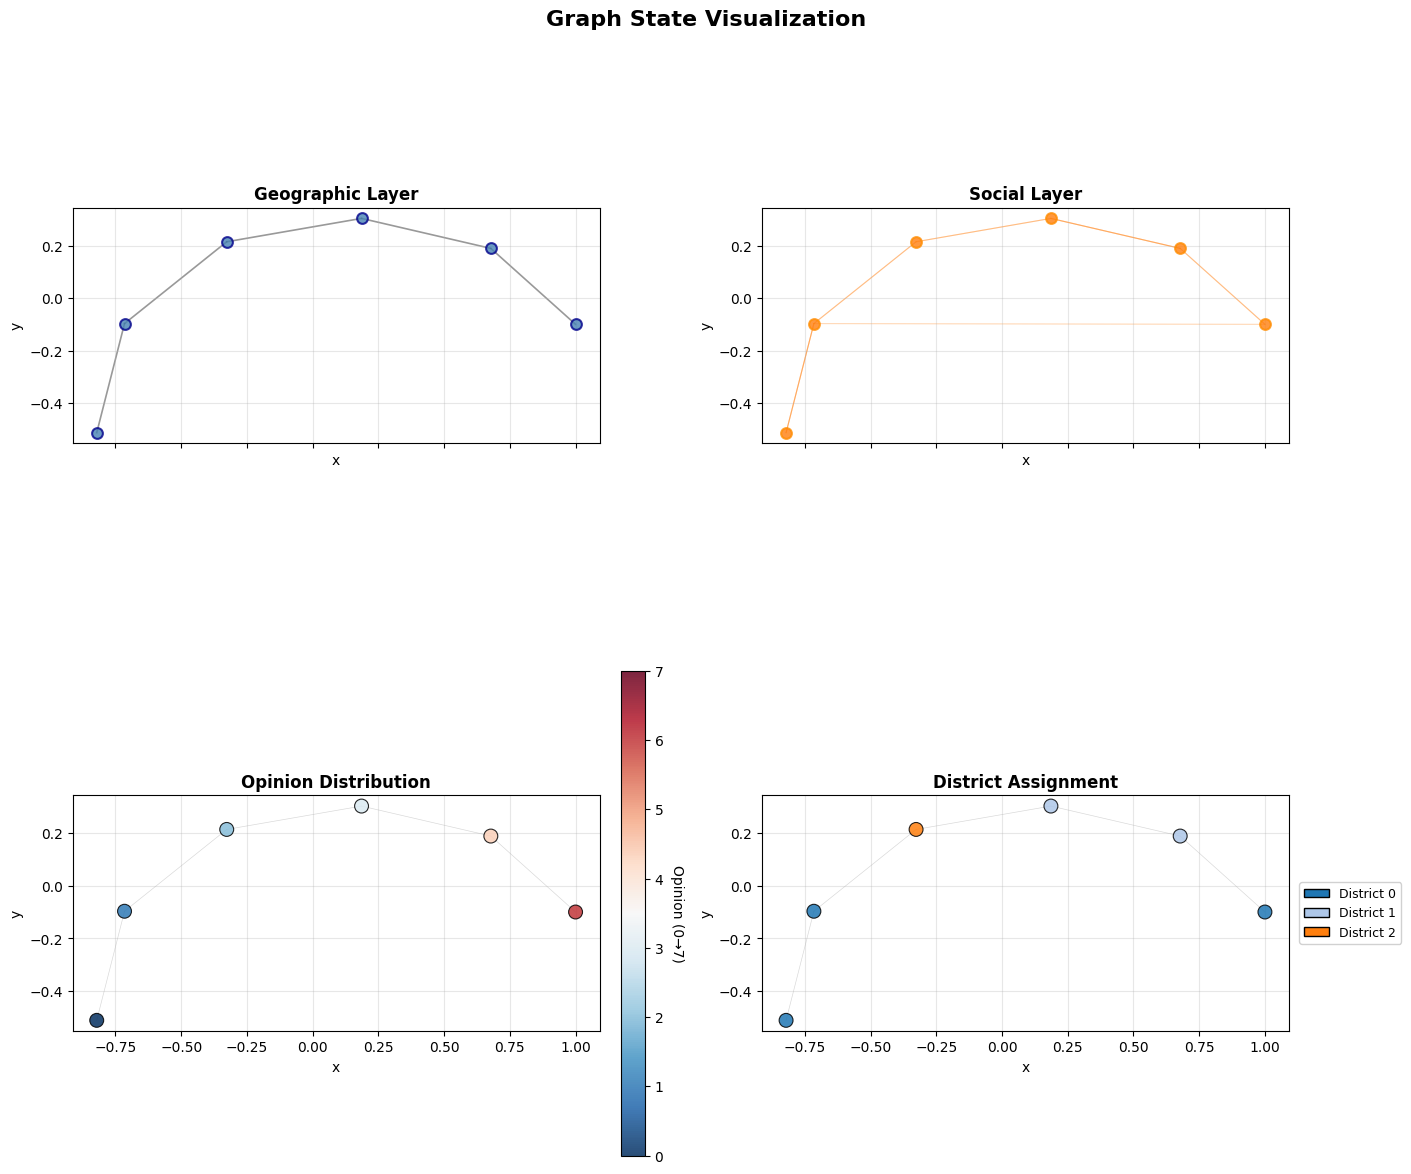

t=1, reps=[1, 3, 2], opinions=[0.0, 1.0, 2.0, 3.0, 4.333333492279053, 6.0], reward=0.0


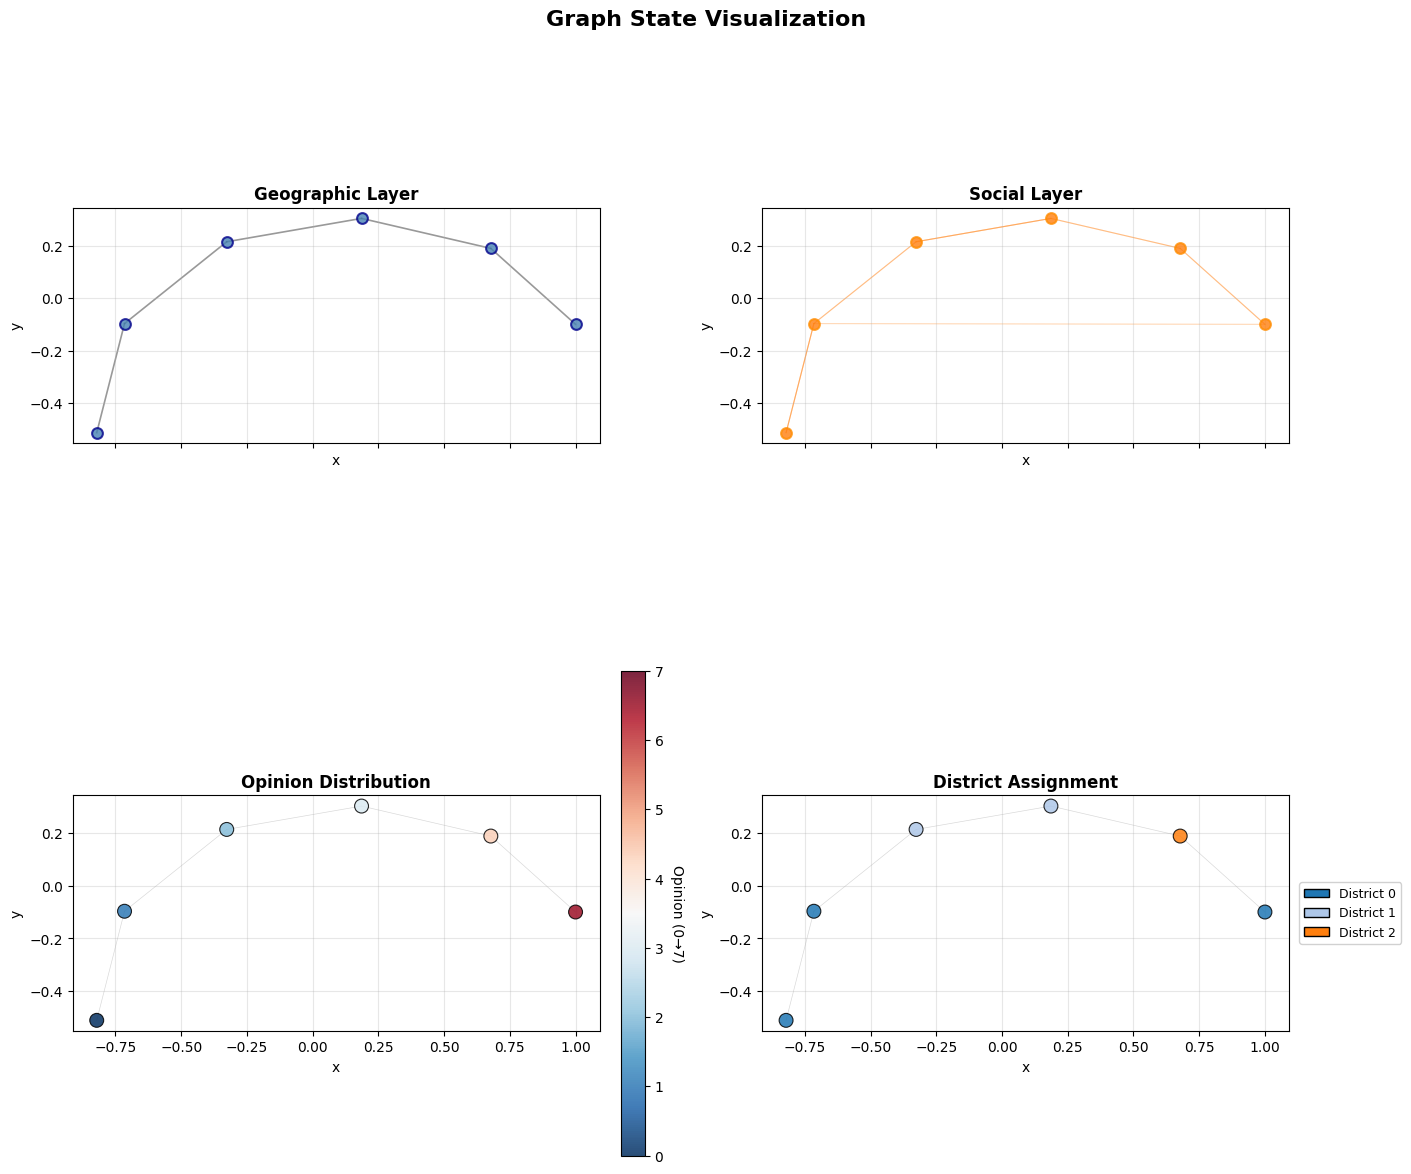

t=2, reps=[1, 2, 4], opinions=[0.0, 1.0, 2.0, 3.0, 4.333333492279053, 6.5], reward=0.16666603088378906


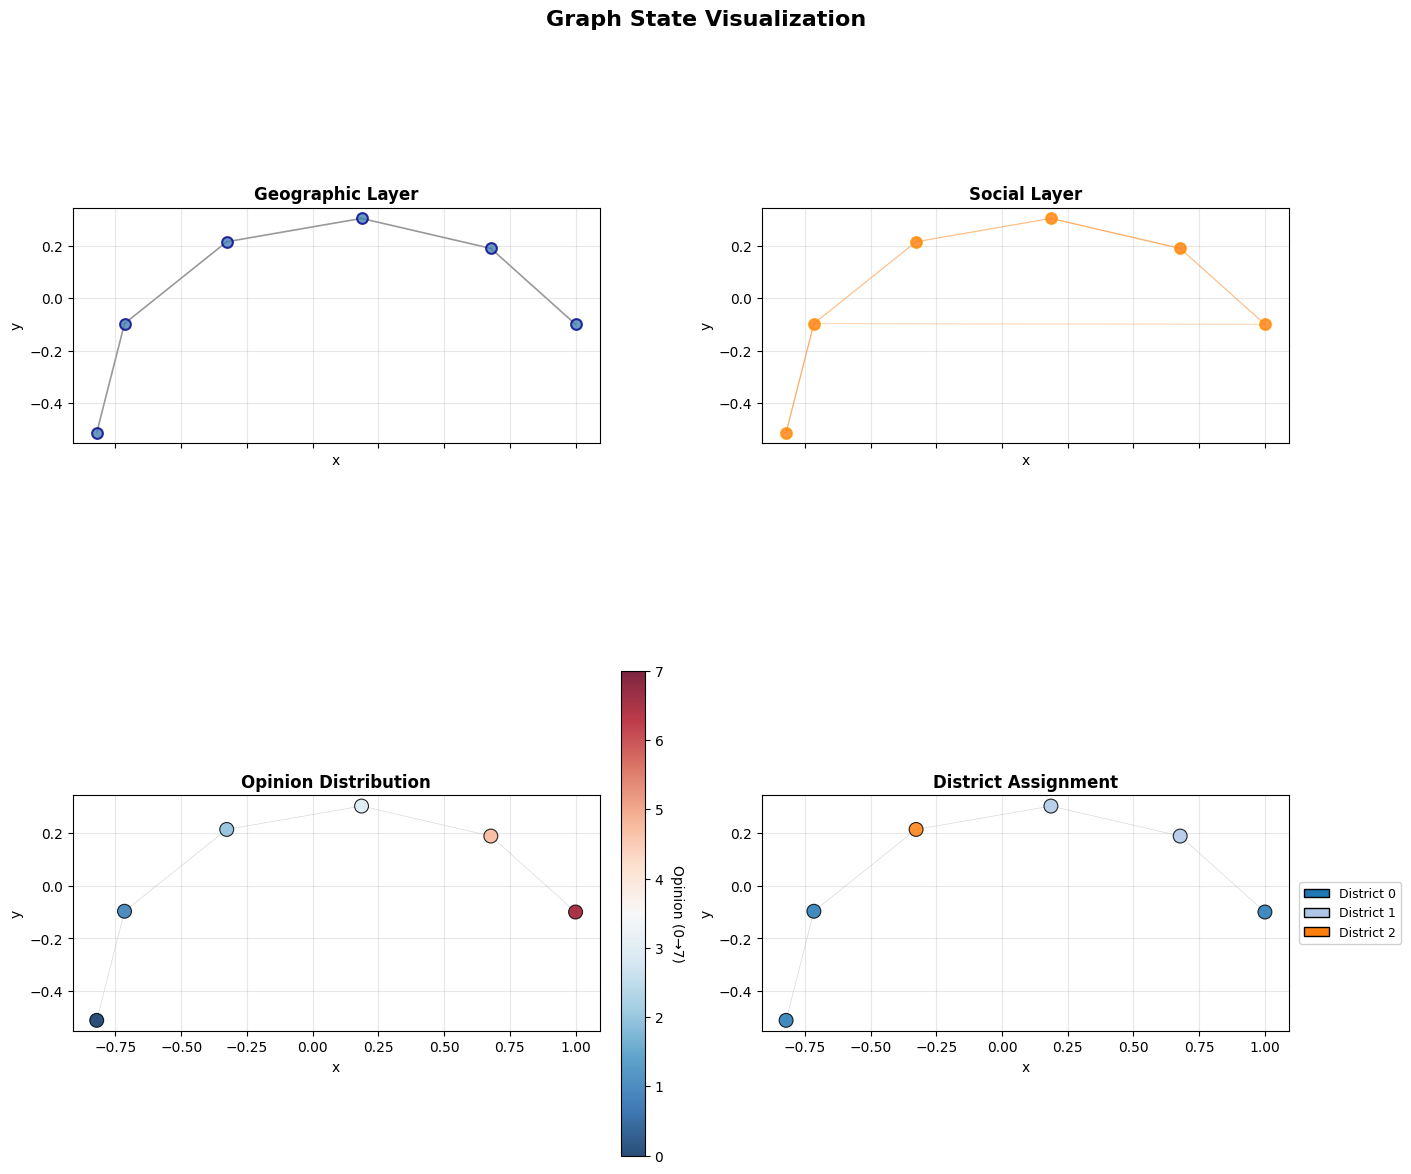

t=3, reps=[1, 3, 2], opinions=[0.0, 1.0, 2.0, 3.0, 4.6666669845581055, 6.5], reward=0.0


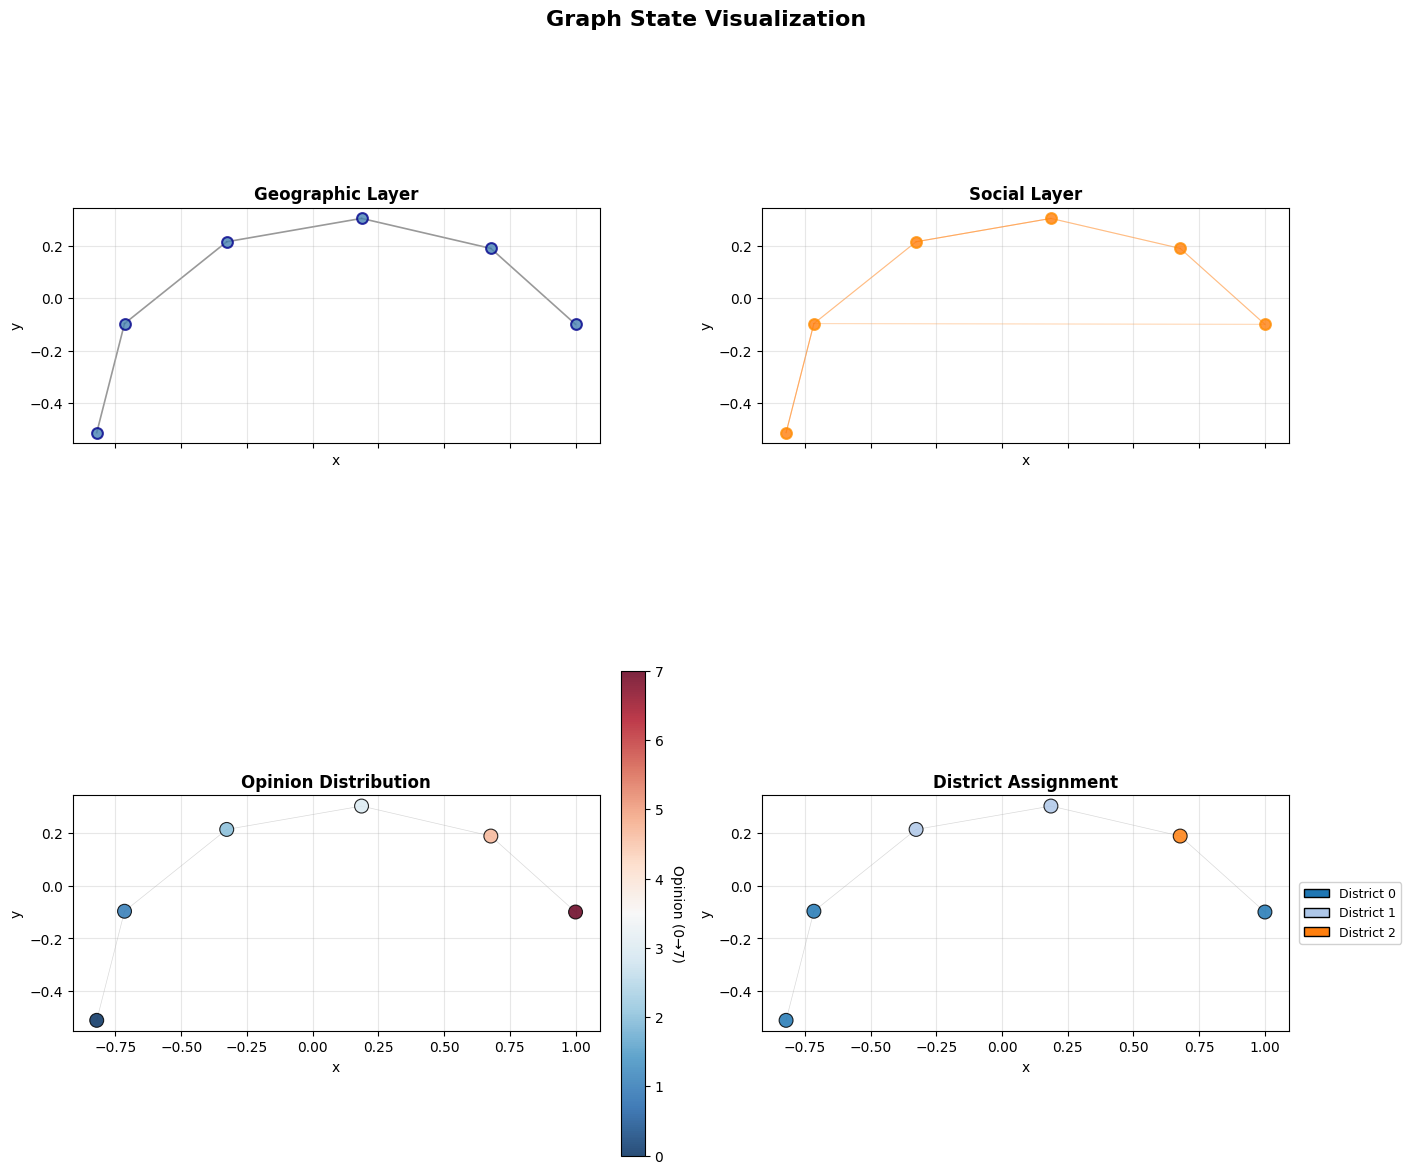

t=4, reps=[1, 2, 4], opinions=[0.0, 1.0, 2.0, 3.0, 4.6666669845581055, 7.0], reward=0.16666603088378906


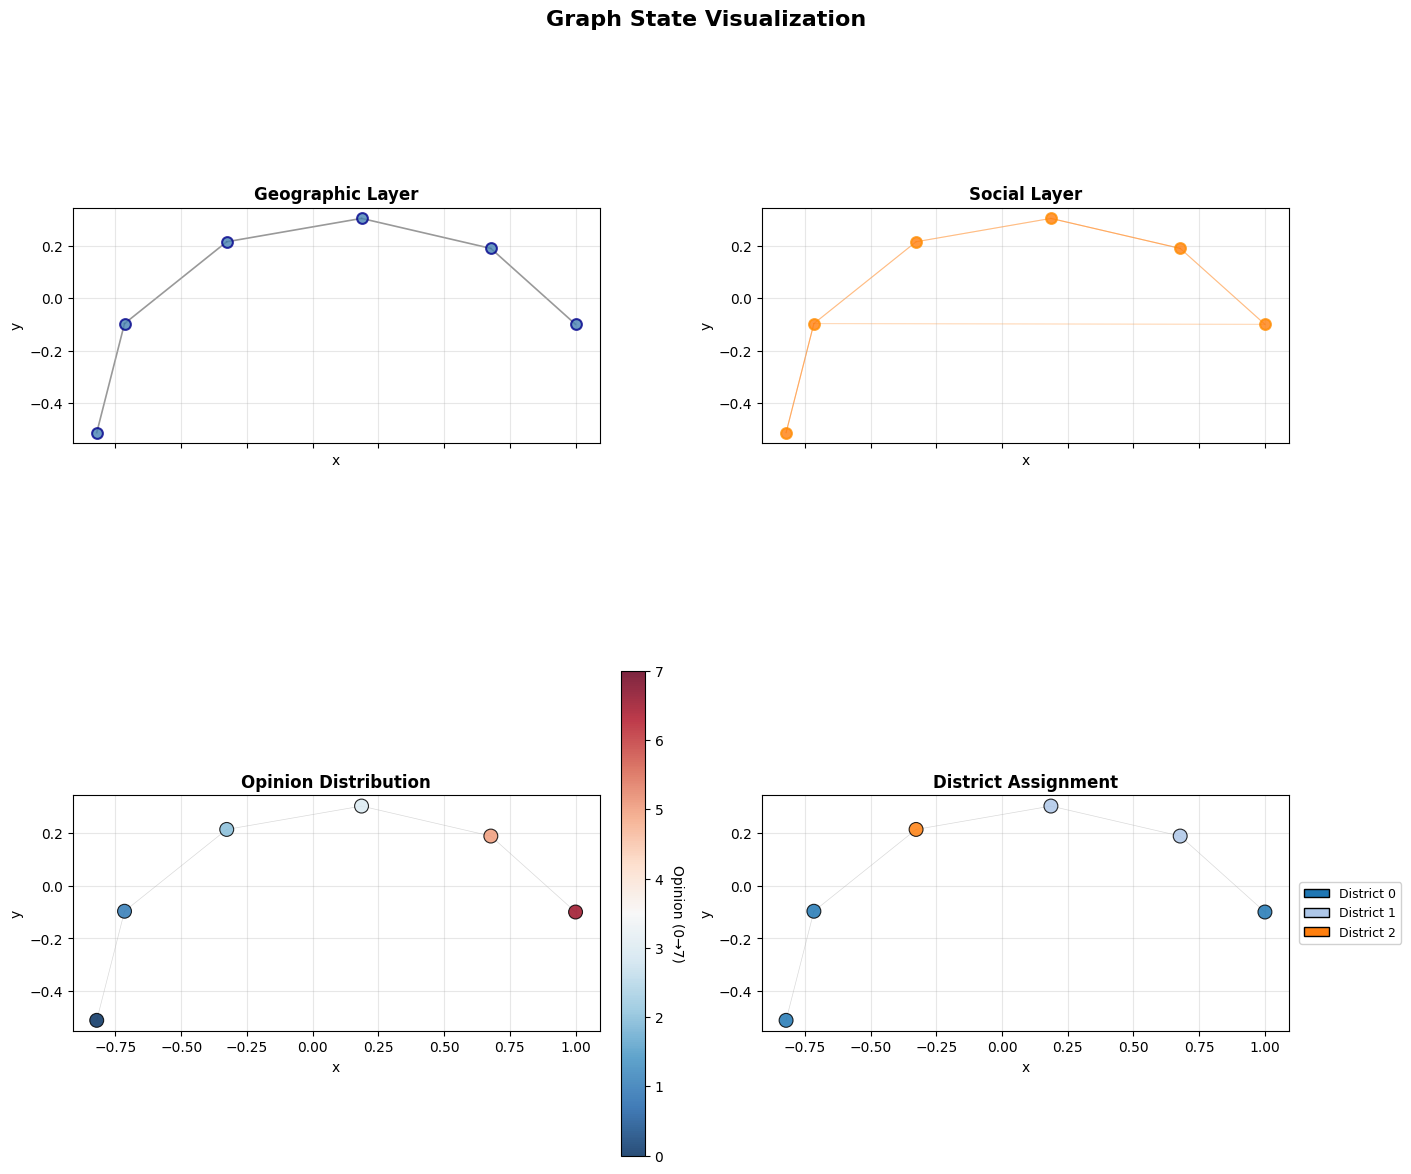

t=5, reps=[1, 3, 2], opinions=[0.0, 1.0, 2.0, 3.0, 5.000000476837158, 6.5], reward=-0.5000019073486328


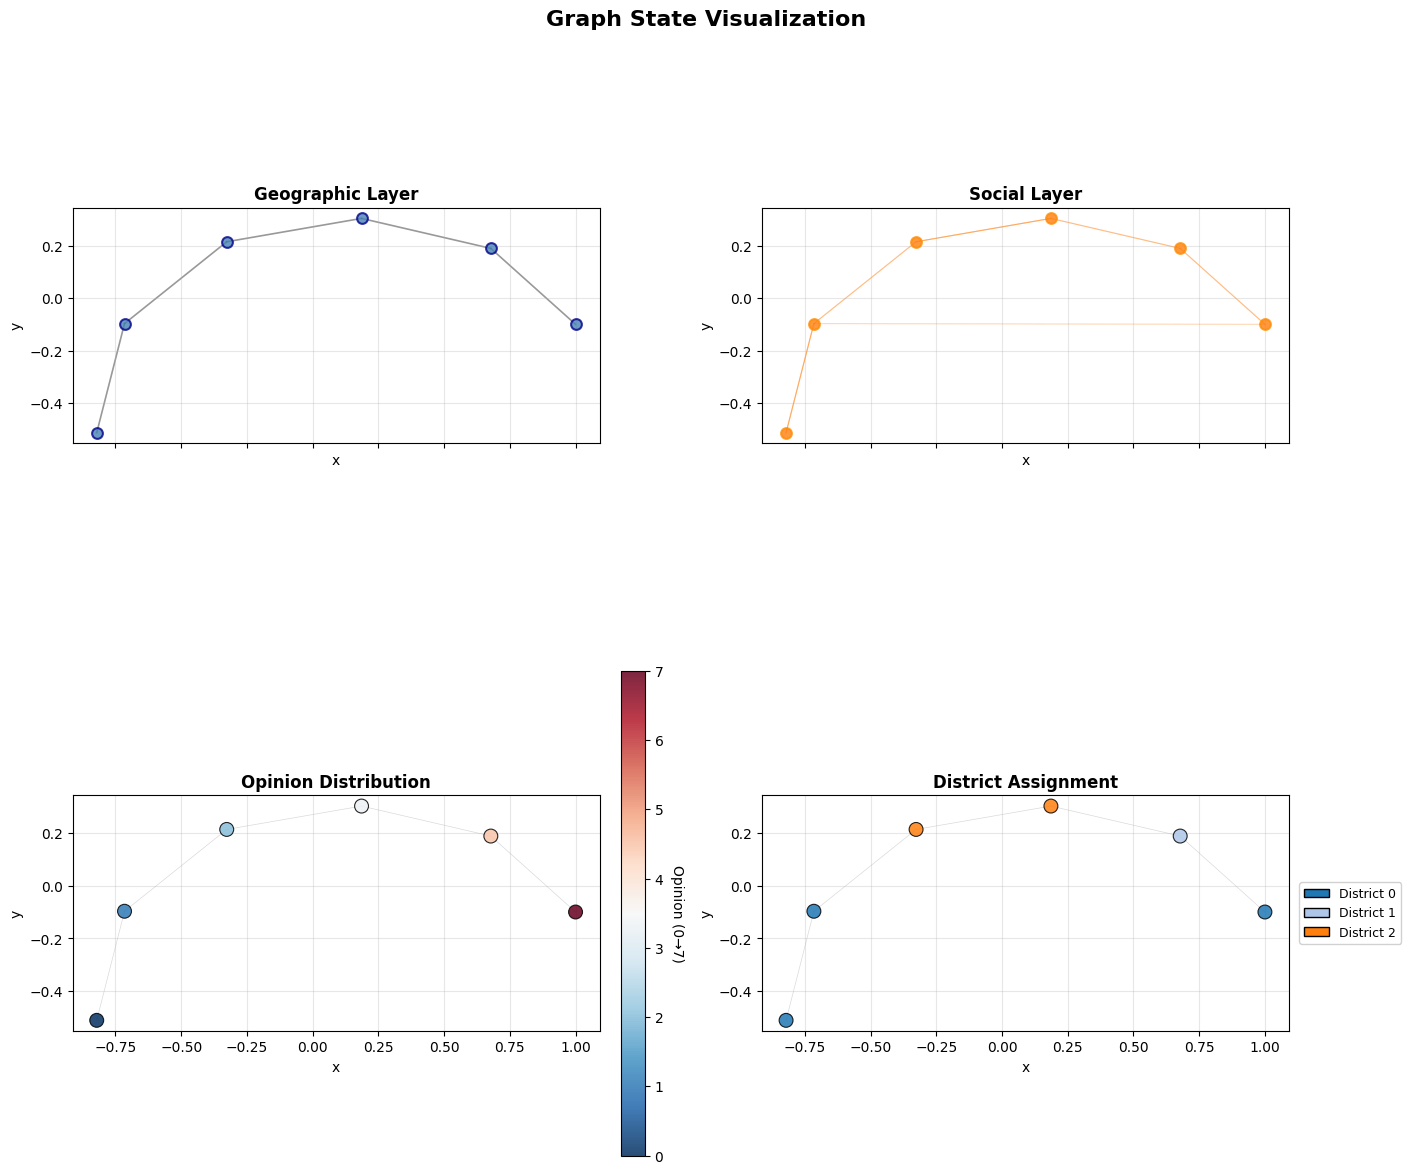

t=6, reps=[1, 4, 2], opinions=[0.0, 1.0, 2.0, 3.3333332538604736, 4.500000476837158, 7.0], reward=0.0


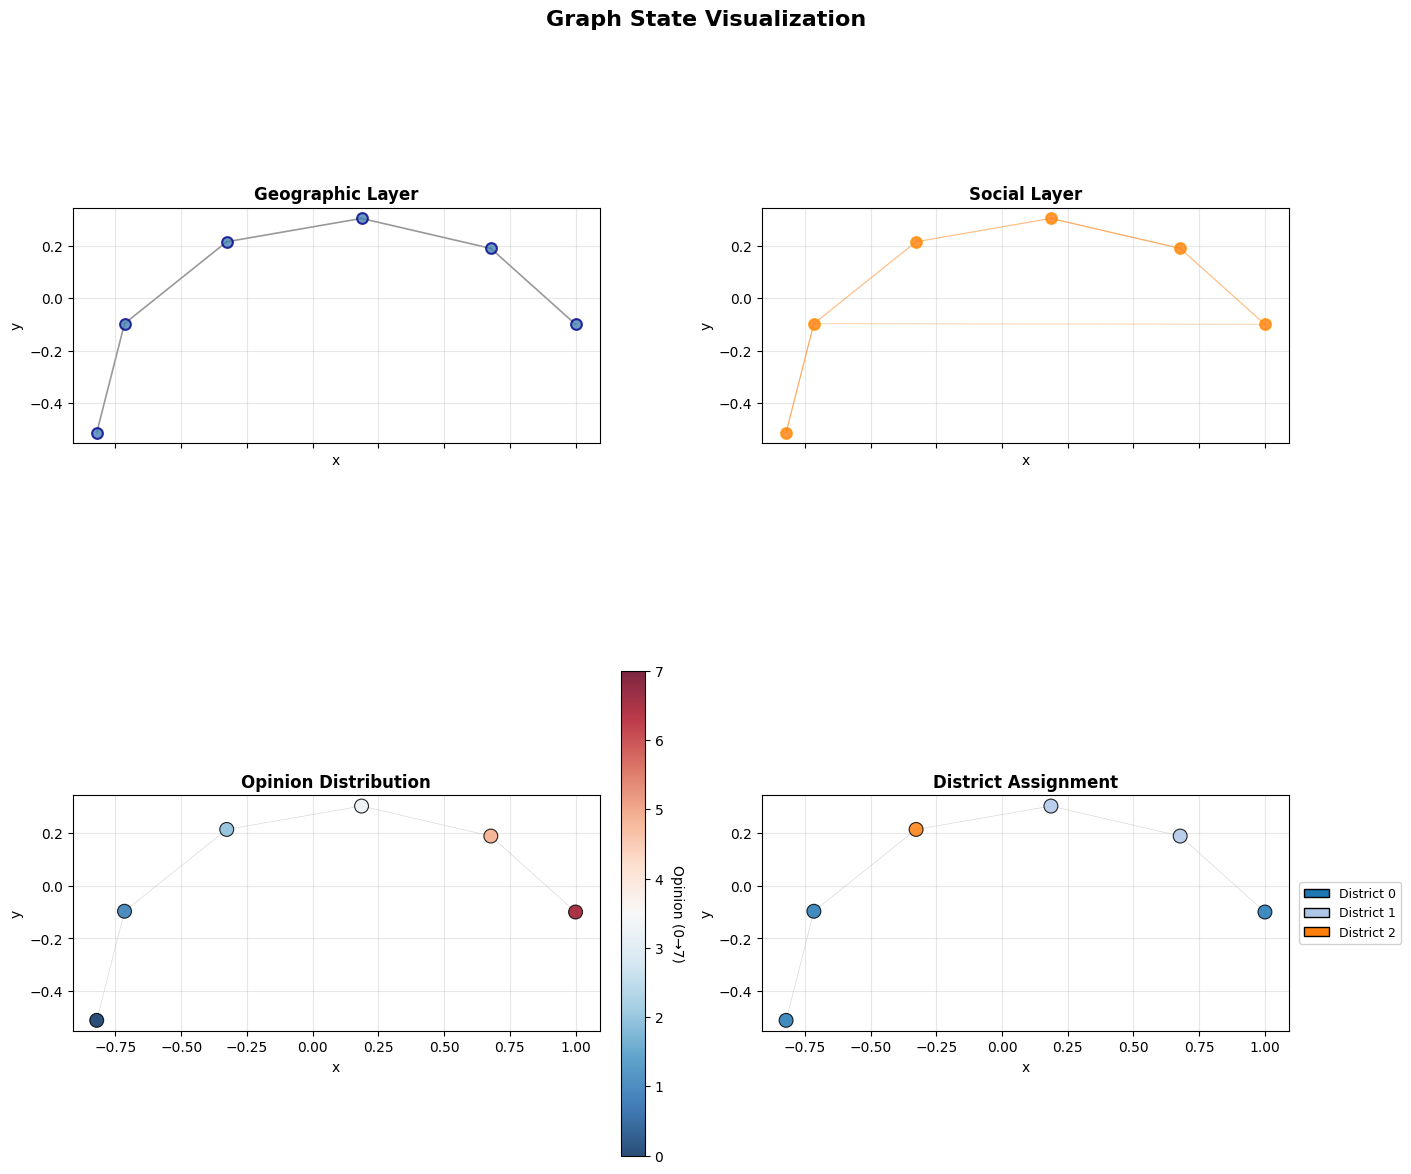

t=7, reps=[1, 3, 2], opinions=[0.0, 1.0, 2.0, 3.3333332538604736, 4.833333969116211, 6.5], reward=-0.5


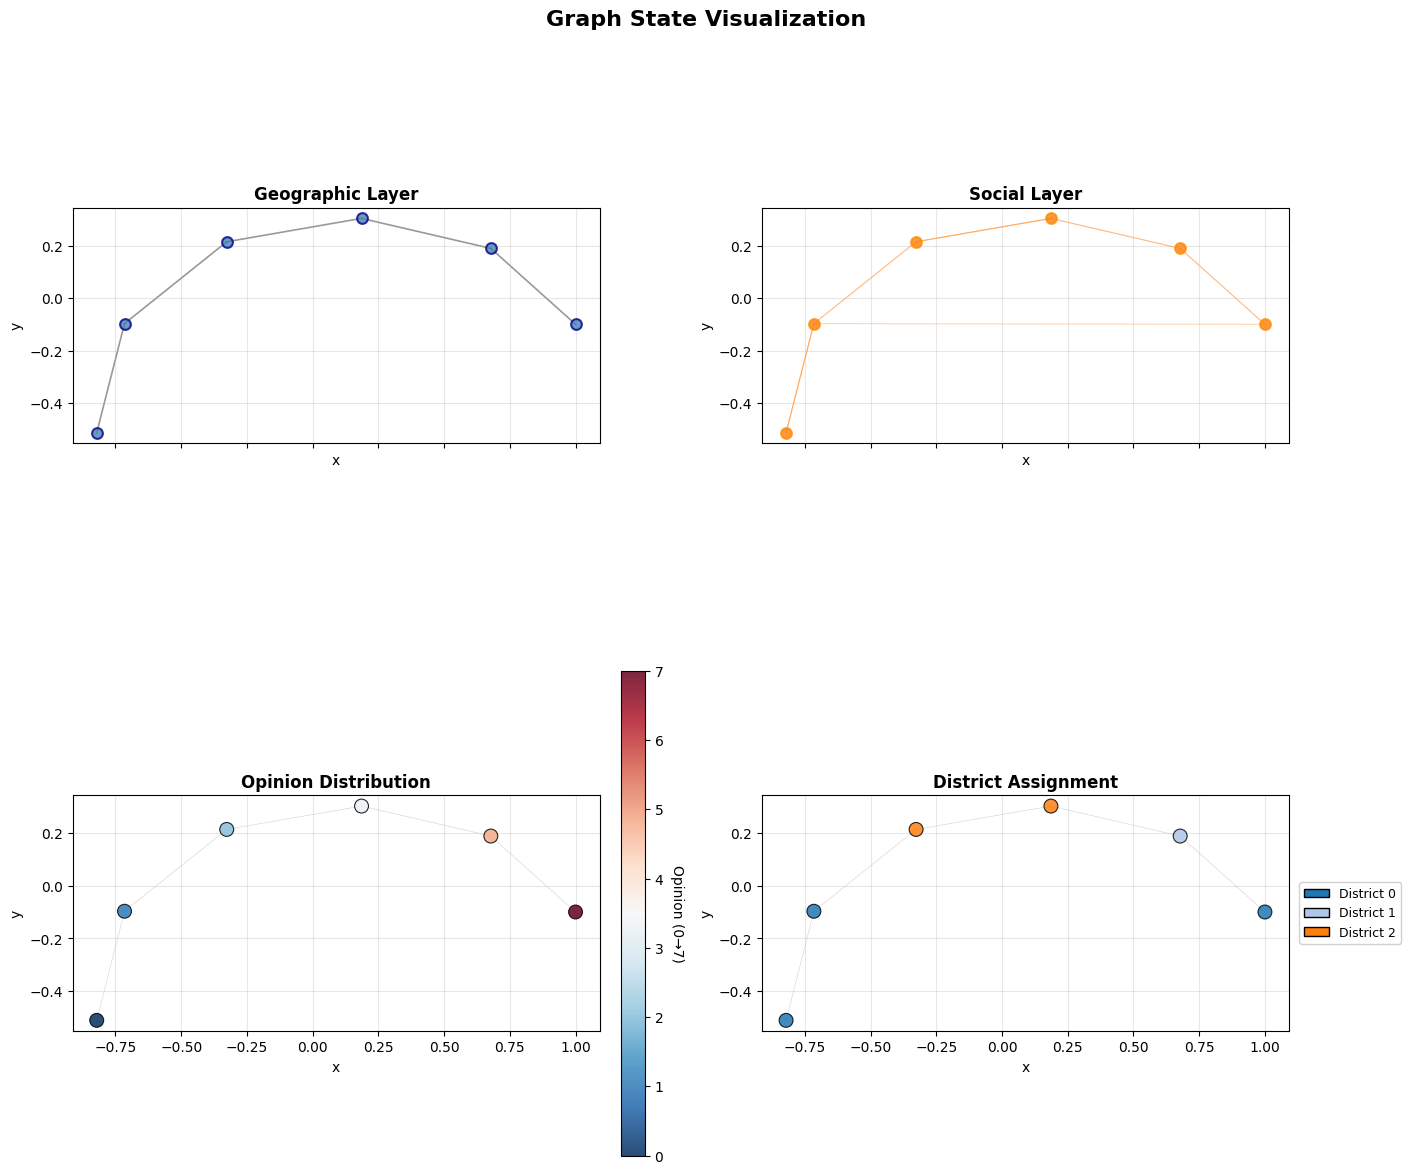

t=8, reps=[1, 4, 2], opinions=[0.0, 1.0, 2.0, 3.3333332538604736, 4.833333969116211, 7.0], reward=0.16666603088378906


In [19]:
init_inch_soc_data, G_inch = build_inchworm_soc_init_data()

num_voters = init_inch_soc_data.opinion.shape[0]
num_districts = 3

env = FrankenmanderingEnv(num_voters=num_voters,
                          num_districts=num_districts,
                          opinion_dim=1,
                          FrankenData=init_inch_soc_data,
                          target_opinion=[7,7,7,7,7,7])


obs, _ = env.reset()

districts = [
    [0,0,2,1,1,0],
    [0,0,1,1,2,0],
    [0,0,2,1,1,0],
    [0,0,1,1,2,0],
    [0,0,2,1,1,0],
    [0,0,2,2,1,0],
    [0,0,2,1,1,0],
    [0,0,2,2,1,0]
]
history = run_inchworm(env, districts,num_districts, drf_inchworm_withso)
